<AxesSubplot:>

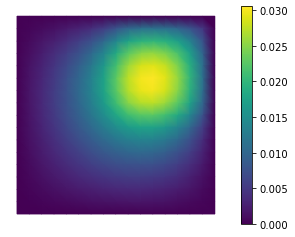

In [8]:
import numpy as np
import skfem as fem
from skfem.helpers import dot, grad  # helpers make forms look nice
@fem.BilinearForm
def a(u, v, _):
   return dot(grad(u), grad(v))
import numpy as np
def theta(x_arr):
    return (x_arr>=0.5)
@fem.LinearForm
def L(v, w):
    x, y = w.x  # global coordinates
    f =  theta(x)*theta(y)  #np.sin(np.pi * x) * np.sin(np.pi * y)
    return f * v
mesh = fem.MeshTri().refined(4)
Vh = fem.Basis(mesh, fem.ElementTriP1())
D = Vh.get_dofs()
A = a.assemble(Vh)

l = L.assemble(Vh)
system = fem.condense(A, l, D=D)
x = fem.solve(*system)


from skfem.visuals.matplotlib import plot, savefig

plot(mesh, x, shading='gouraud', colorbar=True)

In [37]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [123]:
import matplotlib.pyplot as plt
def alpha(x,al = 0.5):
    return x**0.5

def interpolate_func(func, pos, global_len=50):
    h = 1/(global_len)
    result = []
    if pos==1:
        result.append(func[1]/h)
        return [func[1]/h]
    else:
        result = interpolate_func(func, pos-1, global_len=global_len)
        c_sum = np.sum(result)
        loc_ret = (func[pos]-func[pos-1])/h - c_sum
        print(loc_ret)
        result.append(loc_ret)
    return result



def relu_apply(x, arr):
    def relu(y):
        return np.max(0,y)
    return np.sum(relu(x-arr))

N=10
domain = np.linspace(0,1,100)
x_vec = np.linspace(0,1,N+1)
func_vals = alpha(x_vec)
loc = interpolate_func(func_vals,N,global_len=N)
#print(func_vals[1])
print(loc)

#result_vec = relu_apply(domain, loc)
#print(-x_vec[0:10])

-1.8524193653371792
-0.3047686747791174
-0.1577598747669855
-0.10081725375638007
-0.07161361097935859
-0.05426530762343673
-0.042961928267518656
-0.0351105741524238
-0.029394051011116806
[3.162277660168379, -1.8524193653371792, -0.3047686747791174, -0.1577598747669855, -0.10081725375638007, -0.07161361097935859, -0.05426530762343673, -0.042961928267518656, -0.0351105741524238, -0.029394051011116806]


In [283]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress Tensorflow messages


In [287]:
encoder_input = tf.keras.Input(shape=(1))
#x = layers.subtract([encoder_input,x_vec.T])
x = layers.Dense(10, activation="relu")(encoder_input)
#x = layers.Dense(24, activation="relu")(x)
#x = layers.Dense(10)(x)
encoder_output = layers.Dense(1)(x)

model = tf.keras.Model(encoder_input, encoder_output, name="encoder")
#print(model.get_weights())
#model.summary()

In [233]:
model_t = tf.keras.Sequential()
model_t.add(layers.Input(shape=1))
model_t.add(Linear(units=10,name='my_linear_layer'))
model_t.add(layers.Dense(1))
model_t.compile()

In [291]:
weight_list = [np.ones(10).reshape((1,10)), -x_vec[0:10].reshape((10,)),np.array(loc).reshape((10,1)) ,np.array([0])]
for layer in weight_list:
    try:
       print(layer.shape)
    except:
        print()
model.set_weights(weight_list)

res = float(model_t(tf.convert_to_tensor([0.05])))
print(res)

(1, 10)
(10,)
(10, 1)
(1,)
0.5375086665153503


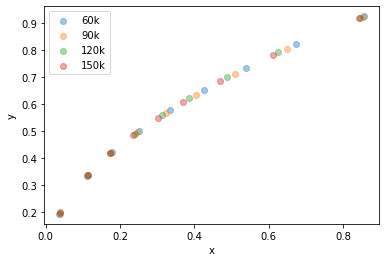

In [226]:
domain_l = np.linspace(-0.00,1.6,120)
offset = -model.layers[1].get_weights()[1][1:]
offset_150k = offset
#print(offset[1:])
#plt.plot(domain_l,alpha(domain_l))
#plt.scatter(x_vec,alpha(x_vec),alpha=0.3)
#plt.plot(domain_l,model(domain_l))

plt.scatter(offset_60k,alpha(offset_60k),alpha=0.4,label='60k')
plt.scatter(offset_90k,alpha(offset_90k),alpha=0.4,label='90k')
plt.scatter(offset_120k,alpha(offset_120k),alpha=0.4,label='120k')
plt.scatter(offset_150k,alpha(offset_150k),alpha=0.4,label='150k')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/alpha_grid.png')


[0.03728359 0.0372836  0.03728358 0.03026514 0.01981439 0.01981439
 0.01981437 0.01981437 0.01981437 0.01576087 0.01395714 0.0139572
 0.01395714 0.01395711 0.0139572  0.01395714 0.01204476 0.01110789
 0.01110783 0.01110795 0.01110783 0.01110792 0.01110792 0.01110786
 0.01026314 0.00925213 0.00925213 0.00925201 0.00925207 0.00925201
 0.00925207 0.00925201 0.00925213 0.00925201 0.00832951 0.0079903
 0.0079903  0.0079903  0.00799036 0.00799018 0.00799048 0.00799012
 0.00799024 0.00799036 0.00755018 0.00710005 0.00710011 0.00710028
 0.00709993 0.00710011 0.00710016 0.00710005 0.00710011 0.00710022
 0.00710011 0.00685865 0.0063743  0.00637412 0.0063746  0.00637388
 0.00637424 0.00637436 0.00637424 0.006374   0.00637424 0.00637418
 0.00637442 0.00637436 0.00590247 0.00576615 0.00576609 0.00576627
 0.0057658  0.00576609 0.00576603 0.00576621 0.00576609 0.00576615
 0.00576609 0.00576615 0.00576621 0.00576609 0.00576586 0.00530577
 0.00524944 0.0052495  0.0052495  0.00524956 0.00524956 0.005249

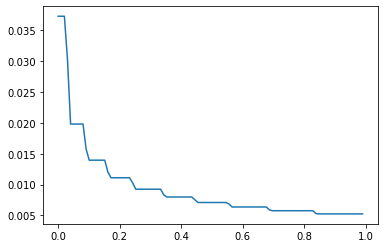

In [211]:
#print(model.get_weights())
y_aaa = model(domain).numpy().flatten()
y_aaa = np.diff(y_aaa)#/0.01010101
x_aaa = np.diff(domain)#.reshape(99,0)
print(y_aaa)

plt.plot(domain[:-1], y_aaa )

In [258]:
model_t.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
              loss=tf.keras.losses.MAE)


In [221]:
model.fit(domain,alpha(domain),epochs=300000,verbose=0)

In [299]:
class Linear_t(layers.Layer):
    def __init__(self, units=32,**kwargs):
        super(Linear_t, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=False,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        # print()
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b )



model_t = tf.keras.Sequential()
model_t.add(layers.Input(shape=1))
model_t.add(Linear_t(units=10,name='my_linear_layer'))
model_t.add(tf.keras.layers.ReLU())
model_t.add(layers.Dense(1))
#model_t.compile()
weight_list = [np.ones(10).reshape((10,)), -x_vec[0:10].reshape((1,10)),np.array(loc).reshape((10,1)) ,np.array([0])]
model_t.set_weights(weight_list)
model_t.summary()
print(model_t.get_weights())
print(model.get_weights())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_linear_layer (Linear_t)   (None, 10)                20        
_________________________________________________________________
re_lu (ReLU)                 (None, 10)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 11        
Total params: 31
Trainable params: 21
Non-trainable params: 10
_________________________________________________________________
[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32), array([[-0. , -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]],
      dtype=float32), array([[ 3.1622777 ],
       [-1.8524194 ],
       [-0.30476868],
       [-0.15775988],
       [-0.10081726],
       [-0.07161361],
       [-0.05426531],
       [-0.04296193],
       [-0.03511057],
       [-0.02939405]], dtype=fl

In [285]:
model_t.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
              loss=tf.keras.losses.MAE)

In [278]:
#model_t.fit(domain,alpha(domain),epochs=300000,verbose=0)

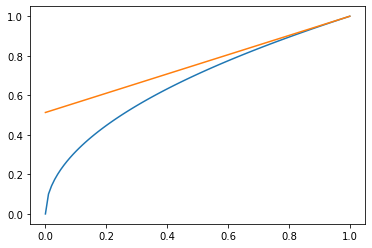

In [300]:
plt.plot(domain,alpha(domain))
#plt.scatter(x_vec,alpha(x_vec),alpha=0.3)
plt.plot(domain,model_t(domain))